In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes_df = pd.read_csv('diabetes.csv',sep =',')

In [3]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


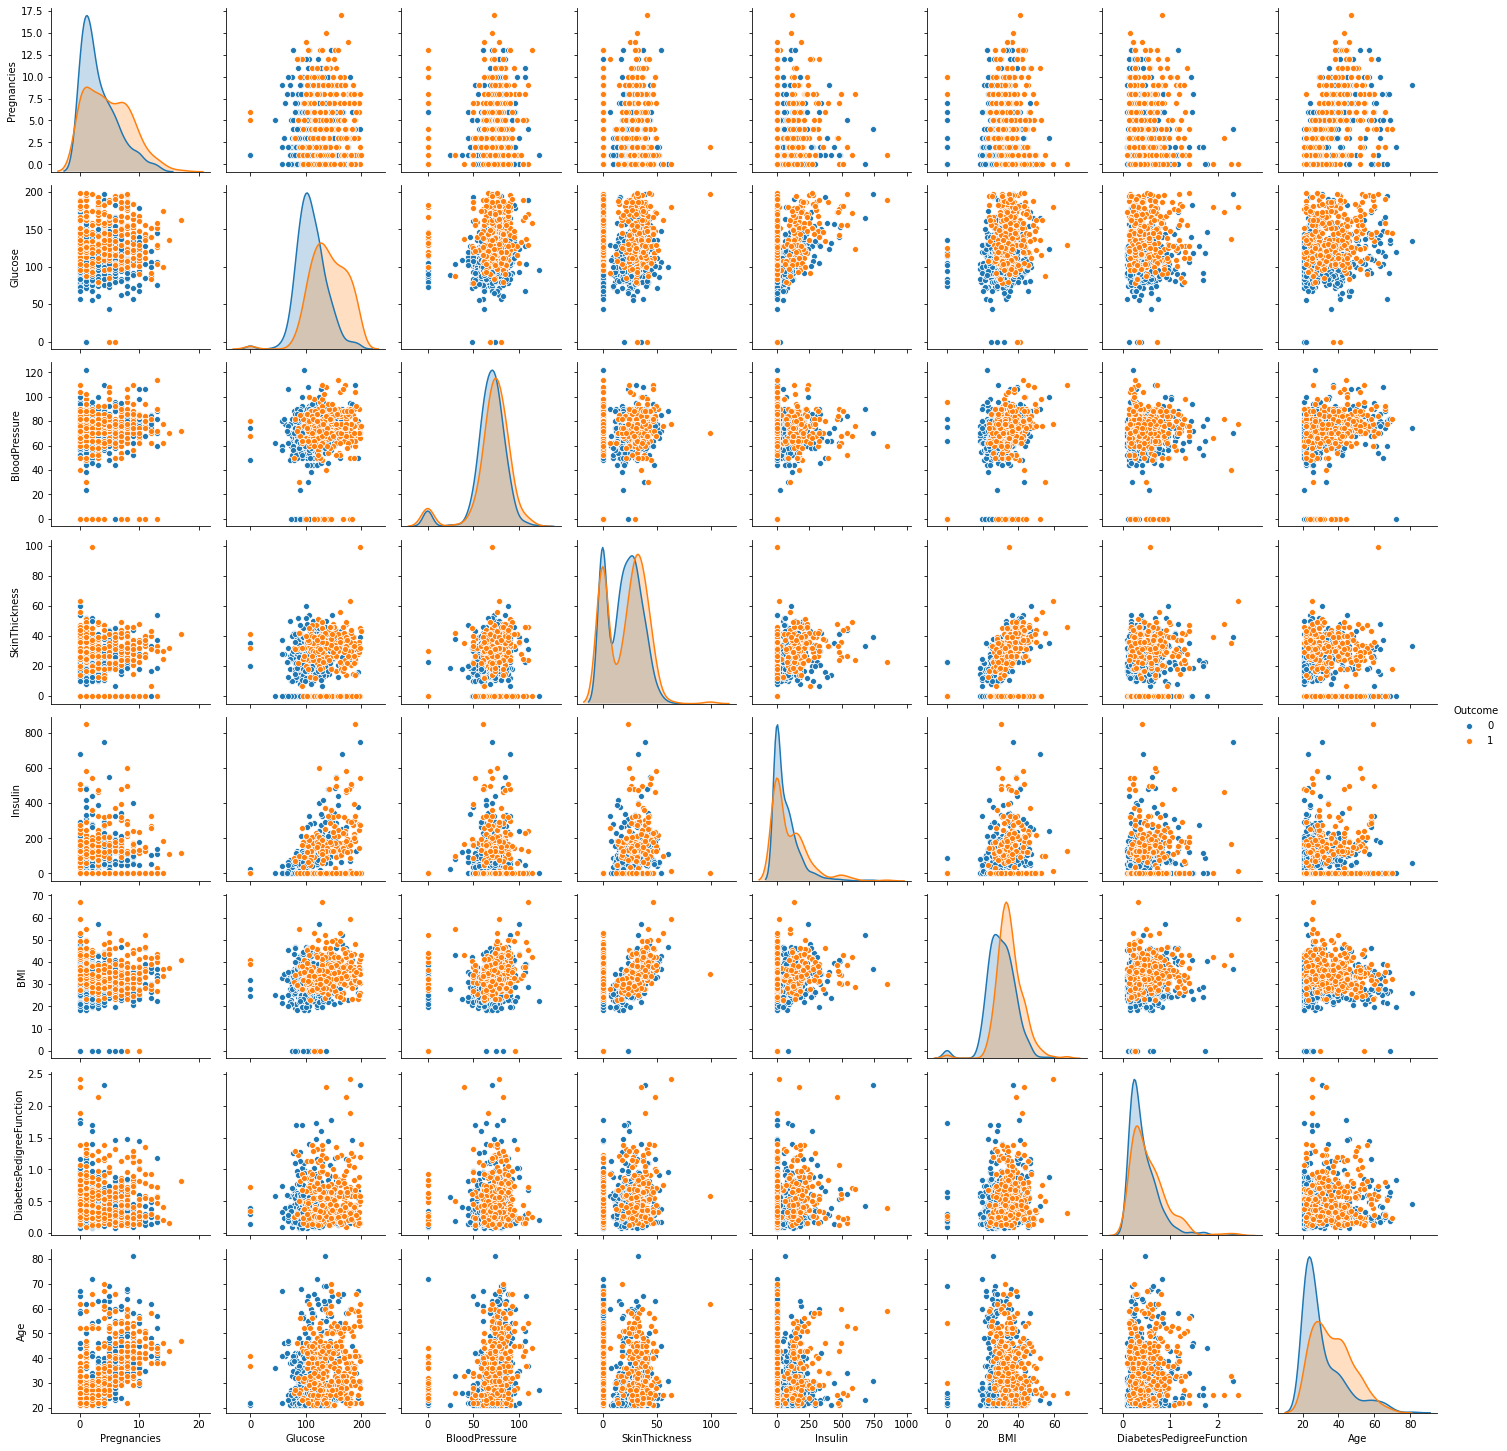

In [6]:
sns.pairplot(diabetes_df,hue = 'Outcome' ,vars = ['Pregnancies' ,'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction','Age'])

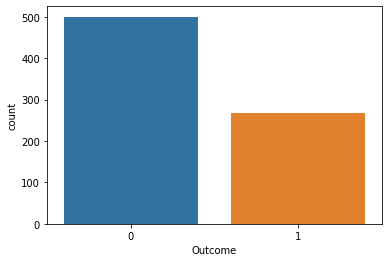

In [8]:
sns.countplot(diabetes_df['Outcome'])

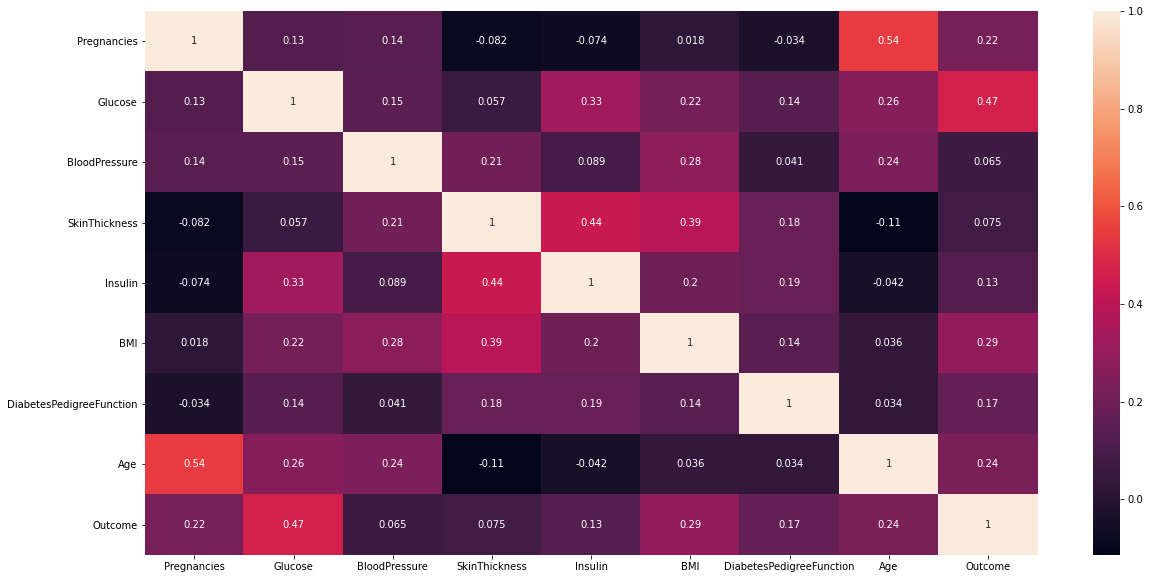

In [9]:
plt.figure(figsize = (20,10))
sns.heatmap(diabetes_df.corr(), annot = True)

In [12]:
X = diabetes_df.drop(['Outcome'],axis = 1)

In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [18]:
y = diabetes_df['Outcome']

In [22]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =5)

In [26]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
140,3,128,78,0,0,21.1,0.268,55
358,12,88,74,40,54,35.3,0.378,48
143,10,108,66,0,0,32.4,0.272,42
674,8,91,82,0,0,35.6,0.587,68
121,6,111,64,39,0,34.2,0.260,24
...,...,...,...,...,...,...,...,...
73,4,129,86,20,270,35.1,0.231,23
400,4,95,64,0,0,32.0,0.161,31
118,4,97,60,23,0,28.2,0.443,22
701,6,125,78,31,0,27.6,0.565,49


In [28]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
567,6,92,62,32,126,32.0,0.085,46
123,5,132,80,0,0,26.8,0.186,69
615,3,106,72,0,0,25.8,0.207,27
492,4,99,68,38,0,32.8,0.145,33
288,4,96,56,17,49,20.8,0.340,26
...,...,...,...,...,...,...,...,...
432,1,80,74,11,60,30.0,0.527,22
480,3,158,70,30,328,35.5,0.344,35
7,10,115,0,0,0,35.3,0.134,29
564,0,91,80,0,0,32.4,0.601,27


In [29]:
from sklearn.svm import SVC 

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
svc_model = SVC()

In [46]:
min_train = X_train.min()
range_train = (X_train-min_train).max()
X_train_scaled = (X_train-min_train)/range_train

min_test = X_test.min()
range_test = (X_test-min_test).max()
X_test_scaled = (X_test-min_test)/range_test

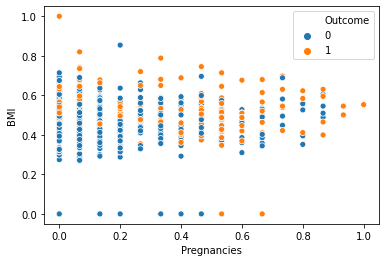

In [47]:
sns.scatterplot(x= X_train_scaled['Pregnancies'],y = X_train_scaled['BMI'], hue = y_train)

In [48]:
svc_model.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
y_predict = svc_model.predict(X_test_scaled)

In [50]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [51]:
cm = confusion_matrix(y_predict,y_test)

In [52]:
cm

array([[88, 24],
       [12, 30]])

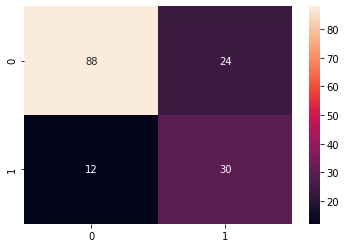

In [53]:
sns.heatmap(cm, annot = True)

In [54]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.71      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



In [55]:
param_grid = {'C':[0.1,1.0,10.0,100.0],'gamma':[1.0,0.1,0.01,0.001],'kernel' : ['rbf']} # rbf = radial basis function

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose = 4 )

In [58]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=1.0, kernel=rbf, score=0.691, total=   0.0s
[CV] C=0.1, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=1.0, kernel=rbf, score=0.683, total=   0.0s
[CV] C=0.1, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=1.0, kernel=rbf, score=0.699, total=   0.0s
[CV] C=0.1, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=1.0, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=1.0, kernel=rbf, score=0.697, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.656, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.656, total=   0.0s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV] .

[CV] .... C=100.0, gamma=0.001, kernel=rbf, score=0.691, total=   0.0s
[CV] C=100.0, gamma=0.001, kernel=rbf ................................
[CV] .... C=100.0, gamma=0.001, kernel=rbf, score=0.748, total=   0.0s
[CV] C=100.0, gamma=0.001, kernel=rbf ................................
[CV] .... C=100.0, gamma=0.001, kernel=rbf, score=0.748, total=   0.0s
[CV] C=100.0, gamma=0.001, kernel=rbf ................................
[CV] .... C=100.0, gamma=0.001, kernel=rbf, score=0.770, total=   0.0s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 10.0, 100.0],
                         'gamma': [1.0, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [59]:
grid.best_params_

{'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}

In [60]:
grid_predict = grid.predict(X_test_scaled)

In [61]:
cm = confusion_matrix(grid_predict,y_test)

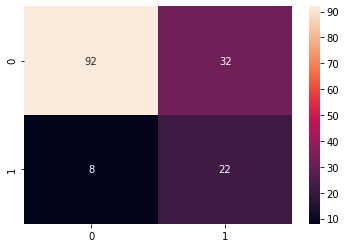

In [62]:
sns.heatmap(cm,annot = True)

In [64]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.71      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

